## Lesson 3. TensorFlow

<ol>
    <li> Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете  Fashion-MNIST.
    </li>
</ol>

In [130]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
from scikeras.wrappers import KerasClassifier

plt.rcParams['figure.figsize'] = [10, 8]
plt.style.use('dark_background')
print(tf.__version__)

2.12.0


In [82]:
#load
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

* Для себя узнаю, есть ли разница в порядке векторизации и скалировании или нет

In [85]:
#building model
model_mnist1 = keras.Sequential([
    keras.layers.Rescaling(input_shape=(28, 28), scale=1./255,name='scaling'),
    keras.layers.Flatten(name='input'),
    keras.layers.Dense(300, activation='relu', name='hidden_one'),
    keras.layers.Dense(150, activation='relu', name='hidden_two'),
    keras.layers.Dense(100, activation='linear', name='hidden_three'),
    keras.layers.Dense(10, activation='softmax', name='output')])

model_mnist1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1.0e-1),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

#model_mnist1.summary()

In [86]:
#building model
model_mnist2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Rescaling(scale=1./255,name='scaling'),
    keras.layers.Dense(300, activation='relu', name='hidden_one'),
    keras.layers.Dense(150, activation='relu', name='hidden_two'),
    keras.layers.Dense(100, activation='linear', name='hidden_three'),
    keras.layers.Dense(10, activation='softmax', name='output')])

model_mnist2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1.0e-1),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

#model_mnist2.summary()

In [ ]:
hist1 = model_mnist1.fit(train_images, to_categorical(train_labels), batch_size = 20000, epochs=30,validation_split=0.2, verbose=1)
hist2 = model_mnist2.fit(train_images, to_categorical(train_labels), batch_size = 20000, epochs=30,validation_split=0.2, verbose=1)

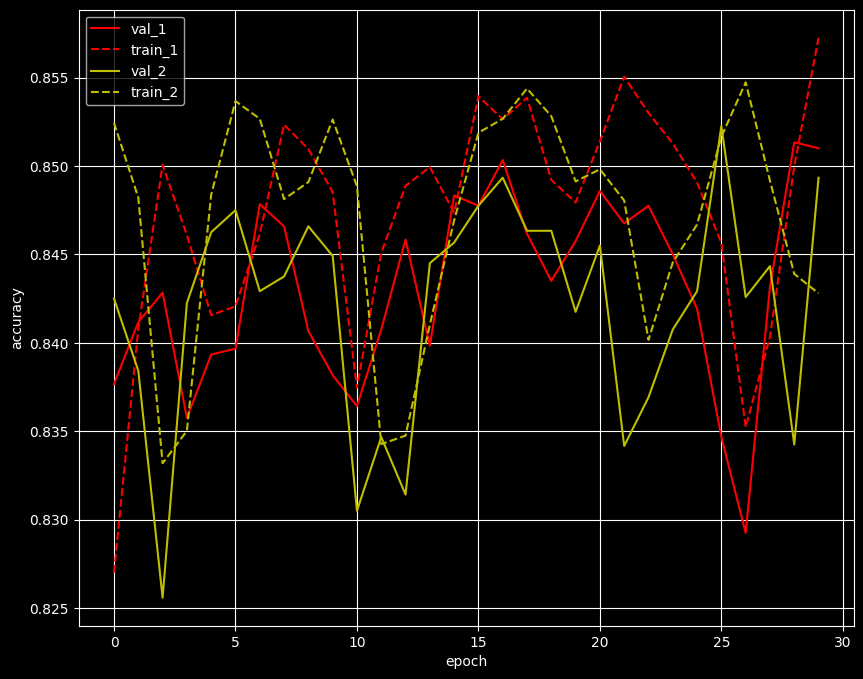

In [112]:
plt.plot(hist1.history['val_accuracy'],label='val_1',c='r')
plt.plot(hist1.history['accuracy'],label='train_1',c='r',linestyle='dashed')
plt.plot(hist2.history['val_accuracy'],label='val_2',c='y')
plt.plot(hist2.history['accuracy'],label='train_2',c='y',linestyle='dashed')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [113]:
test_loss1, test_acc1 = model_mnist1.evaluate(test_images,  to_categorical(test_labels), verbose=2)
test_loss2, test_acc2 = model_mnist2.evaluate(test_images,  to_categorical(test_labels), verbose=2)
print('\nTest accuracy of model 1:', test_acc1)
print('\nTest accuracy of model 2:', test_acc2)

313/313 - 1s - loss: 0.4339 - accuracy: 0.8437 - 627ms/epoch - 2ms/step
313/313 - 1s - loss: 0.4494 - accuracy: 0.8371 - 638ms/epoch - 2ms/step

Test accuracy of model 1: 0.8436999917030334

Test accuracy of model 2: 0.8371000289916992


_________________________
**Разницы особо нет**
_________________________

Поиском по сетке найдем оптимальные параметры: кол-во эпох, оптимизатор и батч

In [131]:
# Build the model.
def create_model(optimizer='SGD'):

    model = keras.Sequential([
    keras.layers.Rescaling(input_shape=(28, 28), scale=1./255,name='scaling'),
    keras.layers.Flatten(name='input'),
    keras.layers.Dense(300, activation='relu', name='hidden_one'),
    keras.layers.Dense(150, activation='relu', name='hidden_two'),
    keras.layers.Dense(100, activation='linear', name='hidden_three'),
    keras.layers.Dense(10, activation='softmax', name='output')])

    model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return model

In [132]:
batch_size = [2000,10000,15000,20000,30000]
epochs = [30, 40, 50]
optimizer = ['SGD', 'RMSprop', 'Adam']

In [133]:
model = KerasClassifier(create_model)
params= dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)

grid = RandomizedSearchCV(model, params, n_iter = 100, cv = 3, verbose=2, random_state=35, n_jobs = -1)
grid_result = grid.fit(train_images, to_categorical(train_labels))

print(grid_result.best_score_, grid_result.best_params_)

df = pd.DataFrame(grid_result.cv_results_)
df.sort_values(['mean_test_score'],ascending=False)[['param_batch_size','param_epochs','param_optimizer','mean_test_score']].head(10)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 45 is smaller than n_iter=100. Running 45 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 2.0538 - accuracy: 0.3225
Epoch 2/50
30/30 [==============================] - 0s 9ms/step - loss: 1.6071 - accuracy: 0.5720
Epoch 3/50
30/30 [==============================] - 0s 6ms/step - loss: 1.3030 - accuracy: 0.6398
Epoch 4/50
30/30 [==============================] - 0s 6ms/step - loss: 1.1100 - accuracy: 0.6679
Epoch 5/50
30/30 [==============================] - 0s 6ms/step - loss: 0.9879 - accuracy: 0.6922
Epoch 6/50
30/30 [==============================] - 0s 5ms/step - loss: 0.9063 - accuracy: 0.7125
Epoch 7/50
30/30 [==============================] - 0s 6ms/step - loss: 0.8486 - accuracy: 0.7276
Epoch 8/50
30/30 [==============================] - 0s 5ms/step - loss: 0.8048 - accuracy: 0.7407
Epoch 9/50
30/30 [==============================] - 0s 5ms/step - loss: 0.7702 - accuracy: 0.7510
Epoch 10/50
30/30 [==============================] - 0s 5ms/step - loss: 0.7414 - accuracy: 0.7606
Epoch 11/50
30/30 [

,param_batch_size,param_epochs,param_optimizer,mean_test_score
6,2000,50,SGD,0.826350
8,2000,50,Adam,0.824450
7,2000,50,RMSprop,0.822967
4,2000,40,RMSprop,0.817050
5,2000,40,Adam,0.816667
3,2000,40,SGD,0.816083
0,2000,30,SGD,0.807400
2,2000,30,Adam,0.805617
1,2000,30,RMSprop,0.803917
15,10000,50,SGD,0.742050


In [135]:
#hist1 = model_mnist1.fit(train_images, to_categorical(train_labels), batch_size = 2000, epochs=50,validation_split=0.2, verbose=1)
test_loss1, test_acc1 = model_mnist1.evaluate(test_images,  to_categorical(test_labels), verbose=2)

313/313 - 1s - loss: 0.3886 - accuracy: 0.8586 - 1s/epoch - 4ms/step


In [136]:
predictions = model_mnist1.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [137]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

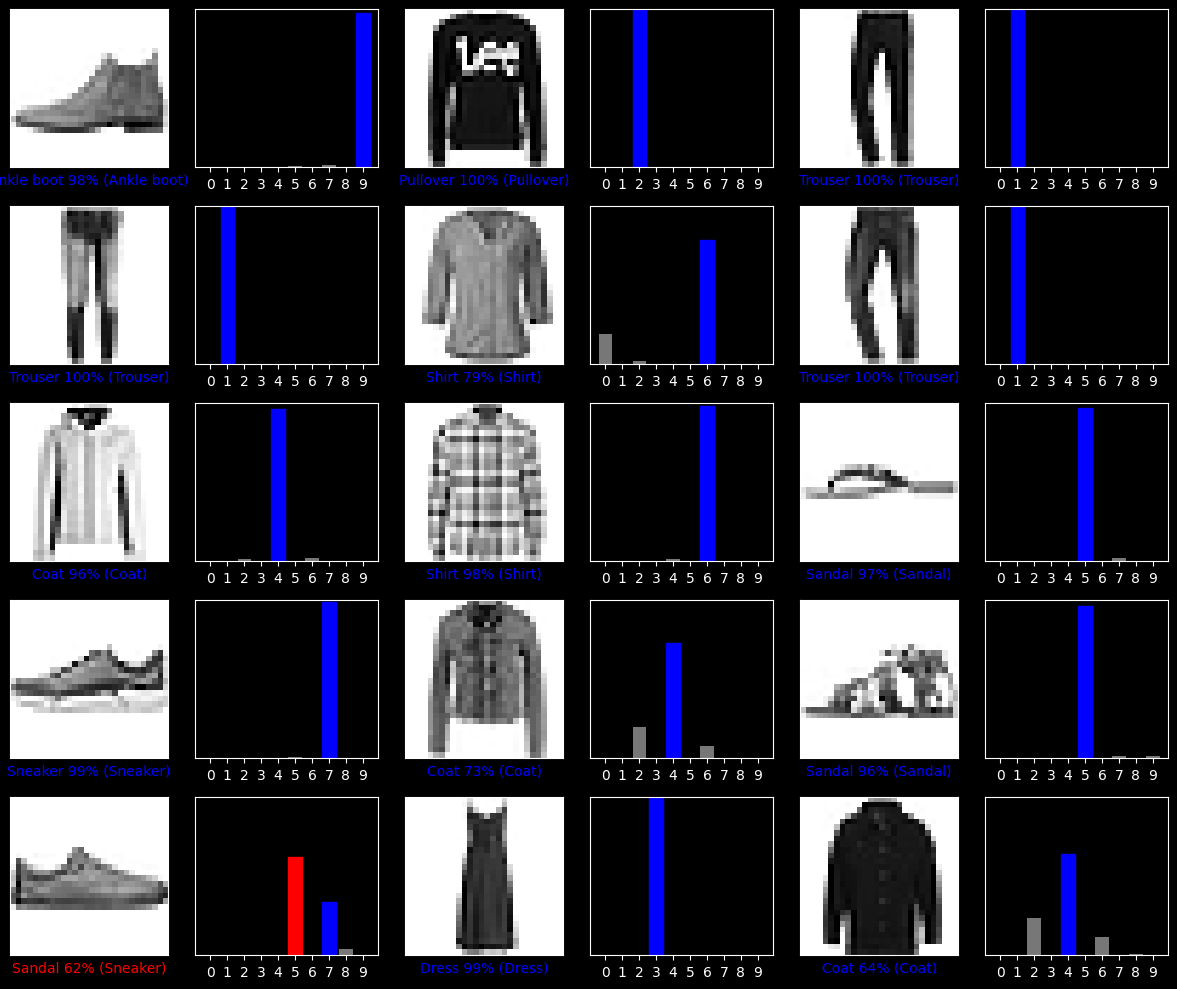

In [138]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
norm = tf.keras.layers.experimental.preprocessing.Normalization()
norm.adapt(dataset)
dataset = dataset.map(lambda t: norm(t))

2